In [16]:
# Installing and Importing all relevant librariries

!pip install wordcloud
!pip install textblob
!pip install vaderSentiment
!pip install plotly


import pandas as pd
import nltk
import re
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from nltk.tokenize import TweetTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from collections import Counter
from string import punctuation
from textblob import TextBlob


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [17]:
# Read the CSV data into a DataFrame
df = pd.read_csv(/content/Sample Dataset.csv)
df.dropna(inplace=True)  # Remove rows with missing values
df.head()


,Date,Headline,Source
0,22-Apr-24,PML-N looks to take early lead in by-polls,Dawn
1,22-Apr-24,Two Customs men slain in another attack in Der...,Dawn
2,22-Apr-24,"Ministries, divisions ordered to return surplu...",Dawn
3,22-Apr-24,Iranian president arrives for three-day visit ...,Dawn
4,22-Apr-24,Aurangzeb expects PIA privatisation by end of ...,Dawn


In [18]:
df.describe()

,Date,Headline,Source
count,726,726,726
unique,12,694,4
top,3-May-24,PM pledges relief for labour class hit hard by...,The Nation
freq,82,2,408


In [19]:
# Download NLTK resources for Text Preprcoessing
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('vader_lexicon')

lemmatizer = WordNetLemmatizer()

stop_words = set(stopwords.words('english'))

# Tokenization
tokenizer = TweetTokenizer()

def preprocess_text(text):
    # Removing URLs and HTML tags
    text = re.sub(r'http\S+|www\S+|<\S+>-,', '', text)

    # Converting text to lowercase
    text = text.lower()

    tokens = tokenizer.tokenize(text)

    # Lemmatizing the tokens
    tokens = [lemmatizer.lemmatize(token) for token in tokens]

    # Remove stopwords, punctuation, single characters, and numerics
    filtered_tokens = [token for token in tokens if token not in stop_words
                       and token not in punctuation and len(token) > 1 and not token.isdigit()]

    return filtered_tokens

# Concatenating all headlines into a single string
text = df['Headline'].str.cat(sep=' ')

# Preprocessing the text
filtered_tokens = preprocess_text(text)

# Extract filtered tokens
df['FilteredTokens'] = df['Headline'].apply(preprocess_text)


Top 20 words and their frequencies:
pakistan: 68
pm: 50
pti: 48
say: 45
cm: 41
minister: 32
govt: 32
president: 31
punjab: 29
case: 28
ihc: 28
killed: 27
terrorist: 26
court: 25
balochistan: 25
wheat: 23
karachi: 22
visit: 21
sc: 21
khan: 20





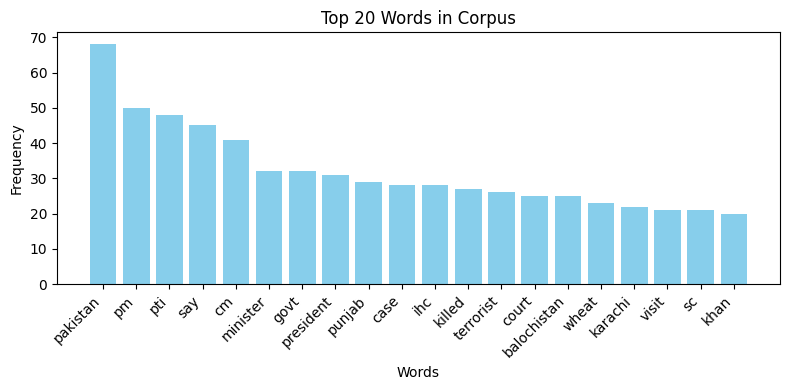

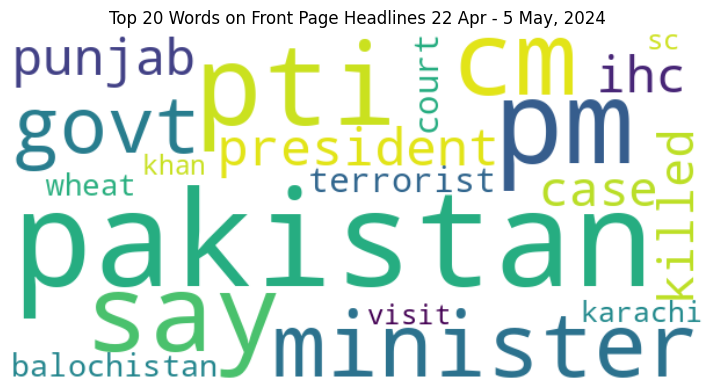

In [20]:
#Analysis 1: Top Words in the Corpus

# Count term frequencies
word_counts = Counter(filtered_tokens)

# Get the top 20 most common words and their frequencies
top_20_words = word_counts.most_common(20)


# Print the top 20 words and their frequencies
print("Top 20 words and their frequencies:")
for word, frequency in top_20_words:
    print(f"{word}: {frequency}")


# Add some space between the charts
print("\n\n")

# Convert the top 20 words and their frequencies into lists for plotting
words, frequencies = zip(*top_20_words)

# Plot the bar graph
plt.figure(figsize=(8, 4))  # Adjust the figure size here
plt.bar(words, frequencies, color='skyblue')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 20 Words in Corpus')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Add space before the word cloud
print("\n" * 3)

# Generating the word cloud
wordcloud = WordCloud(width=600, height=300, background_color='white').generate_from_frequencies(dict(top_20_words))  # Adjust the word cloud size here

# Display the word cloud using matplotlib
plt.figure(figsize=(8, 4))  # Adjust the figure size here
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Top 20 Words on Front Page Headlines 22 Apr - 5 May, 2024')
plt.tight_layout()  # Add tight layout to the word cloud
plt.show()





In [21]:
# Initializing the VADER sentiment analyzer for Sentiment Analysis
sid = SentimentIntensityAnalyzer()

# Iterate over each headline and assign positive or negative sentiment
sentiments = []
compound_scores = []
for tokens in df['FilteredTokens']:
    # Analyze the sentiment of the tokens
    scores = sid.polarity_scores(' '.join(tokens))

    # Determine the overall sentiment label
    if scores['compound'] > 0:
        sentiment = 'Positive'
    elif scores['compound'] < 0:
        sentiment = 'Negative'
    else:
        sentiment = 'Neutral'

    # Append the sentiment label and compound score to the lists
    sentiments.append(sentiment)
    compound_scores.append(scores['compound'])

# Add the sentiments and compound scores to the DataFrame
df['Sentiment'] = sentiments
df['Compound Score'] = compound_scores


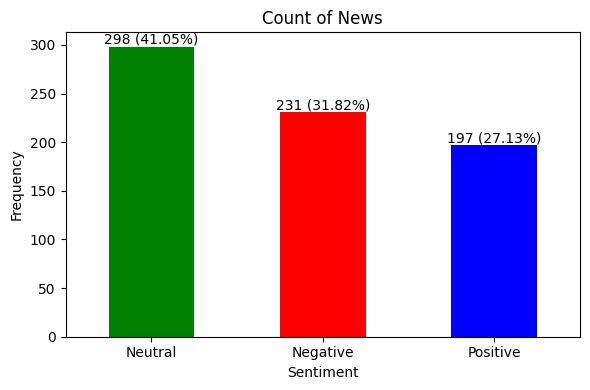

In [22]:
#Analysis 2

# Count the number of positive, negative, and neutral news
sentiment_counts = df['Sentiment'].value_counts()

# Calculate percentages of news
total = sentiment_counts.sum()
percentages = (sentiment_counts / total) * 100

# Plot histogram of sentiment score frequency distribution
plt.figure(figsize=(6, 4))  # Adjust the figure size here
sentiment_counts.plot(kind='bar', color=['green', 'red', 'blue'])
plt.title('Count of News')
plt.xlabel('Sentiment')
plt.ylabel('Frequency')
plt.xticks(rotation=0)

# Annotate percentages and counts on the bars
for index, value in enumerate(sentiment_counts):
    plt.text(index, value, f'{value} ({percentages[index]:.2f}%)', ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [23]:
# Analysis 3: Subjectivity Scores

# Initialize lists to store subjectivity scores
subjectivity_scores = []

# Iterate over each headline and assign subjectivity
for tokens in df['FilteredTokens']:
    # Join tokens into a single string
    text = ' '.join(tokens)

    # Analyze the sentiment of the text
    blob = TextBlob(text)
    subjectivity = blob.sentiment.subjectivity

    # Append subjectivity score to the list
    subjectivity_scores.append(subjectivity)

# Add the subjectivity scores to the DataFrame
df['Subjectivity Score'] = subjectivity_scores

# Print the DataFrame with sentiments and subjectivity scores
print(df.head())


        Date                                           Headline Source  \
0  22-Apr-24         PML-N looks to take early lead in by-polls   Dawn   
1  22-Apr-24  Two Customs men slain in another attack in Der...   Dawn   
2  22-Apr-24  Ministries, divisions ordered to return surplu...   Dawn   
3  22-Apr-24  Iranian president arrives for three-day visit ...   Dawn   
4  22-Apr-24  Aurangzeb expects PIA privatisation by end of ...   Dawn   

                                      FilteredTokens Sentiment  \
0               [pml-n, look, early, lead, by-polls]   Neutral   
1  [two, custom, men, slain, another, attack, der...  Negative   
2  [ministry, division, ordered, return, surplus,...   Neutral   
3  [iranian, president, arrives, three-day, visit...   Neutral   
4  [aurangzeb, expects, pia, privatisation, end, ...   Neutral   

   Compound Score  Subjectivity Score  
0          0.0000                 0.3  
1         -0.4767                 0.0  
2          0.0000                 0.0 

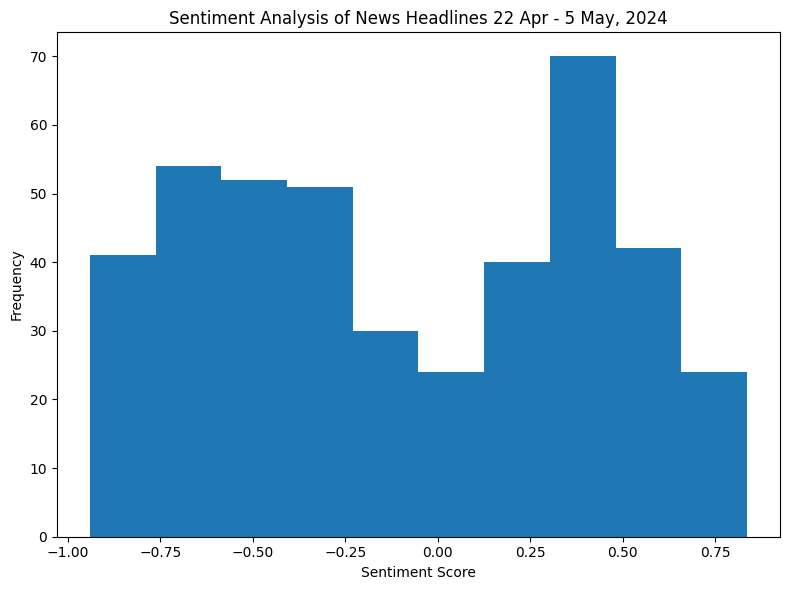

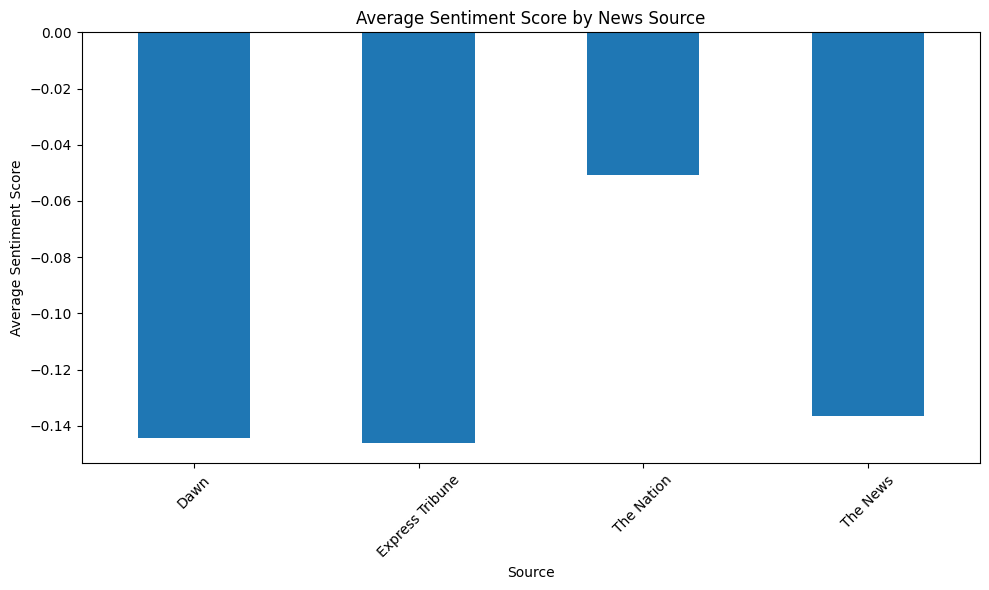

In [24]:
#Analysis 4: Sentiment Analysis

# Add space before the next plot
print("\n" * 3)

# Filter out neutral polarity values
non_neutral_df = df[df['Compound Score'] != 0]

# Plot histogram of non-neutral sentiment scores
plt.figure(figsize=(8, 6))
non_neutral_df['Compound Score'].plot.hist()
plt.title('Sentiment Analysis of News Headlines 22 Apr - 5 May, 2024')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.tight_layout()  # Add tight layout to the histogram
plt.show()

# Add space before the next plot
print("\n" * 3)

# Assuming df is your DataFrame with columns 'Source' and 'Compound Score'
average_scores = non_neutral_df.groupby('Source')['Compound Score'].mean()

# Plot average sentiment score by news source
plt.figure(figsize=(10, 6))
average_scores.plot(kind='bar')
plt.title('Average Sentiment Score by News Source')
plt.xlabel('Source')
plt.ylabel('Average Sentiment Score')
plt.xticks(rotation=45)
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()


In [25]:
# Print the first few rows of the DataFrame
print(df.head())


        Date                                           Headline Source  \
0  22-Apr-24         PML-N looks to take early lead in by-polls   Dawn   
1  22-Apr-24  Two Customs men slain in another attack in Der...   Dawn   
2  22-Apr-24  Ministries, divisions ordered to return surplu...   Dawn   
3  22-Apr-24  Iranian president arrives for three-day visit ...   Dawn   
4  22-Apr-24  Aurangzeb expects PIA privatisation by end of ...   Dawn   

                                      FilteredTokens Sentiment  \
0               [pml-n, look, early, lead, by-polls]   Neutral   
1  [two, custom, men, slain, another, attack, der...  Negative   
2  [ministry, division, ordered, return, surplus,...   Neutral   
3  [iranian, president, arrives, three-day, visit...   Neutral   
4  [aurangzeb, expects, pia, privatisation, end, ...   Neutral   

   Compound Score  Subjectivity Score  
0          0.0000                 0.3  
1         -0.4767                 0.0  
2          0.0000                 0.0 